# 短文字壓縮並使用API拋送測試

## 目的
不使用DB或任何存檔手段，將72字元無損壓縮成32內字元，以符合API限制。

## 現階段結果
- 因字串過短壓縮後又需用Base64轉成可被API傳送的字元，反而照成壓縮率大於1(越壓越大)，無法達32字元目標。
- 若資料量越大(測試為7200字元)則壓縮效果越明顯。

## 思考方向
- 壓縮後結果不用Base64再轉字串，因爲Base64將會讓資料大4/3倍。

## 目前遇到問題
- 如果將Byte資料直接轉chr()結果會是原長度，但內容很多非可顯示文字無法被api傳送，結果得用檔案拋送無法達成原本目標。

## 主流壓縮方式測試內容

### 72字元壓縮測試->目標32字元內

In [27]:
import string
import random
inStrCount = 72
inStr = ''.join(random.choices(string.ascii_uppercase + string.digits, k=inStrCount))
lenInStr = len(inStr)
print("InStr(" + str(len(inStr)) + "):" + inStr)

repeatStr = 'STACK OVERFLOW STACK OVERFLOW STACK OVERFLOW STACK OVERFLOW STACK OVERFLOW STACK OVERFLOW STACK OVERFLOW STACK OVERFLOW STACK OVERFLOW STACK OVERFLOW'
print("RepeatStr(" + str(len(repeatStr)) + "):" + repeatStr)


inStr100x = ''.join(random.choices(string.ascii_uppercase + string.digits, k=inStrCount*100))
lenInStr100x = len(inStr100x)
print("InStr 100x(" + str(len(inStr100x)) + ")")

compressResultLists = []

#Hex
import binascii
hexData = binascii.b2a_hex(inStr.encode("ascii"))
hexStr = hexData.decode("ascii")
print("InToHex(" + str(len(hexStr)) + "):" + hexStr)

#Base64 encode
import base64
def strBase64encodeToStr(oriStr):
    encodedBytes = base64.urlsafe_b64encode(oriStr.encode("utf-8"))
    encodedStr = str(encodedBytes, "utf-8")
    return encodedStr

def bytesBase64encodeToStr(oriBytes):
    encodedBytes = base64.urlsafe_b64encode(oriBytes)
    encodedStr = str(encodedBytes, "utf-8")
    return encodedStr

b64Str = strBase64encodeToStr(inStr)
b64Data = b64Str.encode("ascii")
print("InToBase64(" + str(len(b64Str)) + "):" + b64Str)

#bytesToStr
def bytesToStr(oriData):
    return bytesBase64encodeToStr(oriData)
    #return "".join( chr(x) for x in bytearray(oriData) )

#Brotli
print("\n=== Brotli(Google) ===")
!pip install brotli
import brotli

def bytesBrotliToStr(oriData):
    compressed = brotli.compress(oriData, quality=11)
    result = bytesToStr(compressed)
    return result


outStrOri = bytesBrotliToStr(inStr.encode("utf-8"))
lenStrOri =  len(outStrOri)
print("Out <Brotli> Ori(" + str(lenStrOri) + "):" + outStrOri)

outStrHex = bytesBrotliToStr(hexData)
lenStrHex =  len(outStrHex)
print("Out <Brotli> Hex(" + str(lenStrHex) + "):" + outStrHex)

outStrBase64 = bytesBrotliToStr(b64Data)
lenStrBase64 =  len(outStrBase64)
print("Out <Brotli> B64(" + str(lenStrBase64) + "):" + outStrBase64)

outStrRepeat = bytesBrotliToStr(repeatStr.encode("utf-8"))
lenStrRepeat =  len(outStrRepeat)
print("Out <Brotli> Repeat(" + str(lenStrRepeat) + "):" + outStrRepeat)

outStr100x = bytesBrotliToStr(inStr100x.encode("utf-8"))
lenStr100x =  len(outStr100x)
print("Out <Brotli> 100x(" + str(lenStr100x) + ")")

rateStr = round(lenStrOri / lenInStr ,3)
rateHex = round(lenStrHex / lenInStr ,3)
rateBase64 = round(lenStrBase64 / lenInStr ,3)
rateRepeat = round(lenStrRepeat / lenInStr, 3)
rateStr100x = round(lenStr100x / lenInStr100x, 3)

compressResultLists.append(['BROTLI', lenInStr, lenStrOri, rateStr, lenStrHex, rateHex, lenStrBase64, rateBase64, lenStrRepeat, rateRepeat, lenStr100x, rateStr100x])


#bzip2
print("\n=== bzip2 ===")
#!pip install bz2
import bz2

def bytesBzip2ToStr(oriData):
    compressed = bz2.compress(oriData)
    result = bytesToStr(compressed)
    return result


outStrOri = bytesBzip2ToStr(inStr.encode("utf-8"))
lenStrOri =  len(outStrOri)
print("Out <bzip2> Ori(" + str(lenStrOri) + "):" + outStrOri)

outStrHex = bytesBzip2ToStr(hexData)
lenStrHex =  len(outStrHex)
print("Out <bzip2> Hex(" + str(lenStrHex) + "):" + outStrHex)

outStrBase64 = bytesBzip2ToStr(b64Data)
lenStrBase64 =  len(outStrBase64)
print("Out <bzip2> B64(" + str(lenStrBase64) + "):" + outStrBase64)

outStrRepeat = bytesBzip2ToStr(repeatStr.encode("utf-8"))
lenStrRepeat =  len(outStrRepeat)
print("Out <bzip2> Repeat(" + str(lenStrRepeat) + "):" + outStrRepeat)

outStr100x = bytesBzip2ToStr(inStr100x.encode("utf-8"))
lenStr100x =  len(outStr100x)
print("Out <Brotli> 100x(" + str(lenStr100x) + ")")

rateStr = round(lenStrOri / lenInStr ,3)
rateHex = round(lenStrHex / lenInStr ,3)
rateBase64 = round(lenStrBase64 / lenInStr ,3)
rateRepeat = round(lenStrRepeat / lenInStr, 3)
rateStr100x = round(lenStr100x / lenInStr100x, 3)

compressResultLists.append(['BZIP2', lenInStr, lenStrOri, rateStr, lenStrHex, rateHex, lenStrBase64, rateBase64, lenStrRepeat, rateRepeat, lenStr100x, rateStr100x])


#lzma
print("\n=== lzma(7z) ===")
#!pip install lzma
import lzma

def bytesLzmaToStr(oriData):
    compressed = lzma.compress(oriData)
    result = bytesToStr(compressed)
    return result


outStrOri = bytesLzmaToStr(inStr.encode("utf-8"))
lenStrOri =  len(outStrOri)
print("Out <lzma> Ori(" + str(lenStrOri) + "):" + outStrOri)

outStrHex = bytesLzmaToStr(hexData)
lenStrHex =  len(outStrHex)
print("Out <lzma> Hex(" + str(lenStrHex) + "):" + outStrHex)

outStrBase64 = bytesLzmaToStr(b64Data)
lenStrBase64 =  len(outStrBase64)
print("Out <lzma> B64(" + str(lenStrBase64) + "):" + outStrBase64)

outStrRepeat = bytesLzmaToStr(repeatStr.encode("utf-8"))
lenStrRepeat =  len(outStrRepeat)
print("Out <lzma> Repeat(" + str(lenStrRepeat) + "):" + outStrRepeat)

outStr100x = bytesLzmaToStr(inStr100x.encode("utf-8"))
lenStr100x =  len(outStr100x)
print("Out <Brotli> 100x(" + str(lenStr100x) + ")")

rateStr = round(lenStrOri / lenInStr ,3)
rateHex = round(lenStrHex / lenInStr ,3)
rateBase64 = round(lenStrBase64 / lenInStr ,3)
rateRepeat = round(lenStrRepeat / lenInStr, 3)
rateStr100x = round(lenStr100x / lenInStr100x, 3)

compressResultLists.append(['LZMA', lenInStr, lenStrOri, rateStr, lenStrHex, rateHex, lenStrBase64, rateBase64, lenStrRepeat, rateRepeat, lenStr100x, rateStr100x])


#zstd
print("\n=== zstd(Facebook)===")
!pip install zstandard
import zstandard
      
def bytesZstdToStr(oriData):
    zstd = zstandard.ZstdCompressor()
    compressed = zstd.compress(oriData)
    result = bytesToStr(compressed)
    return result
      
      
outStrOri = bytesZstdToStr(inStr.encode("utf-8"))
lenStrOri =  len(outStrOri)
print("Out <zstd> Ori(" + str(lenStrOri) + "):" + outStrOri)

outStrHex = bytesZstdToStr(hexData)
lenStrHex =  len(outStrHex)
print("Out <zstd> Hex(" + str(lenStrHex) + "):" + outStrHex)

outStrBase64 = bytesZstdToStr(b64Data)
lenStrBase64 =  len(outStrBase64)
print("Out <zstd> B64(" + str(lenStrBase64) + "):" + outStrBase64)

outStrRepeat = bytesZstdToStr(repeatStr.encode("utf-8"))
lenStrRepeat =  len(outStrRepeat)
print("Out <zstd> Repeat(" + str(lenStrRepeat) + "):" + outStrRepeat)

outStr100x = bytesZstdToStr(inStr100x.encode("utf-8"))
lenStr100x =  len(outStr100x)
print("Out <Brotli> 100x(" + str(lenStr100x) + ")")

rateStr = round(lenStrOri / lenInStr ,3)
rateHex = round(lenStrHex / lenInStr ,3)
rateBase64 = round(lenStrBase64 / lenInStr ,3)
rateRepeat = round(lenStrRepeat / lenInStr, 3)
rateStr100x = round(lenStr100x / lenInStr100x, 3)

compressResultLists.append(['ZSTD', lenInStr, lenStrOri, rateStr, lenStrHex, rateHex, lenStrBase64, rateBase64, lenStrRepeat, rateRepeat, lenStr100x, rateStr100x])


InStr(72):1700U9WSUFFYPJZJM2FEYWSBYXJQ6YGO60Y897E1P1T2OPITI9NFM4NWBB7EZUITM7H6J4UE
RepeatStr(149):STACK OVERFLOW STACK OVERFLOW STACK OVERFLOW STACK OVERFLOW STACK OVERFLOW STACK OVERFLOW STACK OVERFLOW STACK OVERFLOW STACK OVERFLOW STACK OVERFLOW
InStr 100x(7200)
InToHex(144):313730305539575355464659504a5a4a4d3246455957534259584a513659474f3630593839374531503154324f50495449394e464d344e57424237455a5549544d3748364a345545
InToBase64(96):MTcwMFU5V1NVRkZZUEpaSk0yRkVZV1NCWVhKUTZZR082MFk4OTdFMVAxVDJPUElUSTlORk00TldCQjdFWlVJVE03SDZKNFVF

=== Brotli(Google) ===
Out <Brotli> Ori(88):G0cA-GV39fyOZHzVdmcFF8tN6YJSDJAdAmg-S5ltypXmmeysYr980Z4RwVJGctNtP2bdNXduoZ9SkK7S8I0SlAA=
Out <Brotli> Hex(108):G48A-AVK58YV-LvWbiOJWooEFyFUstNZWZqxjVKU4-J6ubw5FDq24Tg-XHfKoflTWU6eTBqzXdmSw-9ihMnwUbyBz-Zw0uhVRnjTPCluIA==
Out <Brotli> B64(120):G18A-MXSOWkHZNsh35J3Q3BQCsEUK2Rx1b-xU6sQExQ7UW0_bbkLf7GDICZmgyWsK6JCMKTY2ZW0GpwY7IMVZLV91GV1pMUuCNUxmPnG5kAAW5BLi8LEgQM=
Out <Brotli> Repeat(36):G5QA-I2Uq7NLOTRFVUFL5YpgJUBPmk8zA

## 比較壓縮率 （大於1代表反而增長，數值越低越好）

In [28]:
compressMethodList = ['BROTLI', 'BZIP2', 'LZMA', 'ZSTD']

%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

compResNpArray = np.array(compressResultLists)
resultDF = pd.DataFrame(compResNpArray, columns=['Method','Origin', 'C-Str', 'C-StrR', 'C-Hex', 'C-HexR', 'C-Base64', 'C-Base64R', 'C-Repeat', 'C-RepeatR', 'C-Str100x', 'C-Str100xR'], index=compressMethodList)
print(resultDF)


rateDF = resultDF[['C-StrR', 'C-HexR', 'C-Base64R', 'C-RepeatR', 'C-Str100xR']]
rateLists = rateDF.values.tolist()
#print(rateLists)

chartLabList = ['原字串', '轉Hex', '轉Base64', '重複字串', '100x長度']

        Method Origin C-Str C-StrR C-Hex C-HexR C-Base64 C-Base64R C-Repeat  \
BROTLI  BROTLI     72    88  1.222   108    1.5      120     1.667       36   
BZIP2    BZIP2     72   132  1.833   144    2.0      172     2.389       88   
LZMA      LZMA     72   172  2.389   232  3.222      204     2.833      120   
ZSTD      ZSTD     72   104  1.444   124  1.722      136     1.889       44   

       C-RepeatR C-Str100x C-Str100xR  
BROTLI       0.5      6268      0.871  
BZIP2      1.222      6392      0.888  
LZMA       1.667      6560      0.911  
ZSTD       0.611      6296      0.874  


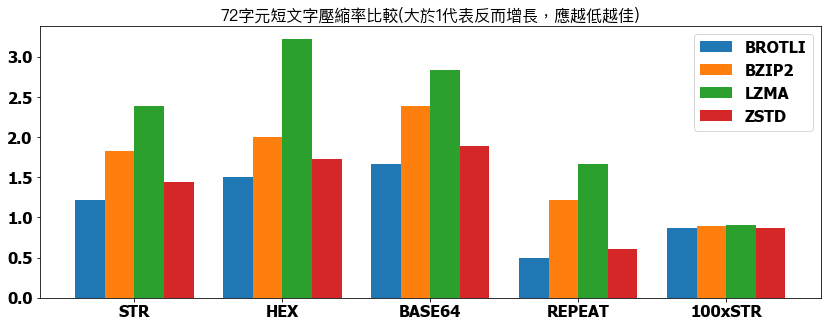

In [32]:
import matplotlib.pyplot as plt

#解決matplot圖表無法顯示中文問題
from matplotlib.font_manager import FontProperties
def getChineseFont():  
    return FontProperties(fname='/System/Library/Fonts/PingFang.ttc',size=16) 

fig, ax = plt.subplots(sharex=False, figsize=(14,5))

font = {'family' : 'sans-serif',
'weight' : 'bold',
'size'  : '16'}
plt.rc('font', **font)        # 步驟一（設定字型的更多屬性）
plt.rc('axes', unicode_minus=False) # 步驟二（解決座標軸負數的負號顯示問題）

value1 = [float(i) for i in rateLists[0]]
value2 = [float(i) for i in rateLists[1]]
value3 = [float(i) for i in rateLists[2]]
value4 = [float(i) for i in rateLists[3]]

N = 5 #資料組分類數
ind = np.arange(N)    # the x locations for the groups
width = 0.2       # the width of the bars
p1 = ax.bar(ind, value1, width)
p2 = ax.bar(ind+width, value2, width)
p3 = ax.bar(ind+2*width, value3, width)
p4 = ax.bar(ind+3*width, value4, width)

ax.set_title("72字元短文字壓縮率比較(大於1代表反而增長，應越低越佳)", fontproperties=getChineseFont())
ax.set_xticks(ind + 1.5*width)
#plt.xticks(index+gap, index)
ax.set_xticklabels(('STR', 'HEX', 'BASE64', 'REPEAT', '100xSTR'))

ax.legend((p1[0], p2[0], p3[0], p4[0] ), ('BROTLI', 'BZIP2', 'LZMA', 'ZSTD'))
ax.autoscale_view()

plt.show()

## 壓縮挑選法參考依據
https://quixdb.github.io/squash-benchmark/unstable/